# ****
# Data Pre-processing & K-Means Clustering Program Sectors.
# ****

In [183]:
# Import relevant Python packages for program-specific purposes with ML --> K-Means Clustering sections.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

pd.options.display.float_format = '{:,.2f}'.format

# Setup the interactive notebook mode.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

In [184]:
sen_data = pd.read_csv("chiliPepperOutputWithPolarity.csv")

In [185]:
sen_data.head()

,tweet_id,Username,text,Artist,created_at,sentiment,polarity
0,1648102801388519425,CRACKANDCOLA,RT @virginsexkiller: @The8BitIdiot did you kno...,Red Hot Chili Peppers,2023-04-17 23:15:02+00:00,positive,0.12
1,1648102131356844032,GunzAnnie,RT @crockpics: The beginning of Red Hot Chili ...,Red Hot Chili Peppers,2023-04-17 23:12:23+00:00,positive,0.12
2,1648100765049978885,_0_0_0_9_,@madebyoona @tylergivens Is the Sox an tribute...,Red Hot Chili Peppers,2023-04-17 23:06:57+00:00,positive,0.12
3,1648099114540990470,JerrodBaker1,"Jacksons\nEarth, Wind &amp; Fire\nRed Hot Chil...",Red Hot Chili Peppers,2023-04-17 23:00:23+00:00,positive,0.15
4,1648097725244907521,dudekable,@softtail65 Desecration Smile - Red Hot Chili ...,Red Hot Chili Peppers,2023-04-17 22:54:52+00:00,positive,0.18


In [186]:
sen_data.isna().sum()

tweet_id      0
Username      0
text          0
Artist        0
created_at    0
sentiment     0
polarity      0
dtype: int64

In [187]:
sen_data.dropna(inplace=True)

In [188]:
sen_data.reset_index().head()

,index,tweet_id,Username,text,Artist,created_at,sentiment,polarity
0,0,1648102801388519425,CRACKANDCOLA,RT @virginsexkiller: @The8BitIdiot did you kno...,Red Hot Chili Peppers,2023-04-17 23:15:02+00:00,positive,0.12
1,1,1648102131356844032,GunzAnnie,RT @crockpics: The beginning of Red Hot Chili ...,Red Hot Chili Peppers,2023-04-17 23:12:23+00:00,positive,0.12
2,2,1648100765049978885,_0_0_0_9_,@madebyoona @tylergivens Is the Sox an tribute...,Red Hot Chili Peppers,2023-04-17 23:06:57+00:00,positive,0.12
3,3,1648099114540990470,JerrodBaker1,"Jacksons\nEarth, Wind &amp; Fire\nRed Hot Chil...",Red Hot Chili Peppers,2023-04-17 23:00:23+00:00,positive,0.15
4,4,1648097725244907521,dudekable,@softtail65 Desecration Smile - Red Hot Chili ...,Red Hot Chili Peppers,2023-04-17 22:54:52+00:00,positive,0.18


In [189]:
Kval = 6

sen_data.dtypes

tweet_id        int64
Username       object
text           object
Artist         object
created_at     object
sentiment      object
polarity      float64
dtype: object

In [190]:
# Mapping and Encoding data values within the sen_data Pandas DataFrame.
artist_map = {'The Weeknd' : 0, 'Red Hot Chili Peppers' : 1, 'Soulja Boy' : 2} # Mapping per artist.
sen_data = sen_data.applymap(lambda x : artist_map.get(x) if x in artist_map else x) # Application per artist.

sentiment_map = {'positive' : 0, 'neutral' : 1, 'negative' : 2} # Mapping per sentiment type.
sen_data = sen_data.applymap(lambda x : sentiment_map.get(x) if x in sentiment_map else x) # Application per sentiment type.

sen_data.head()

,tweet_id,Username,text,Artist,created_at,sentiment,polarity
0,1648102801388519425,CRACKANDCOLA,RT @virginsexkiller: @The8BitIdiot did you kno...,1,2023-04-17 23:15:02+00:00,0,0.12
1,1648102131356844032,GunzAnnie,RT @crockpics: The beginning of Red Hot Chili ...,1,2023-04-17 23:12:23+00:00,0,0.12
2,1648100765049978885,_0_0_0_9_,@madebyoona @tylergivens Is the Sox an tribute...,1,2023-04-17 23:06:57+00:00,0,0.12
3,1648099114540990470,JerrodBaker1,"Jacksons\nEarth, Wind &amp; Fire\nRed Hot Chil...",1,2023-04-17 23:00:23+00:00,0,0.15
4,1648097725244907521,dudekable,@softtail65 Desecration Smile - Red Hot Chili ...,1,2023-04-17 22:54:52+00:00,0,0.18


In [191]:
# Altering the datetime column of created_at to %YYYY formatting.
sen_data['created_at'] = pd.to_datetime(sen_data['created_at']).dt.strftime('%Y')

sen_data.head()

,tweet_id,Username,text,Artist,created_at,sentiment,polarity
0,1648102801388519425,CRACKANDCOLA,RT @virginsexkiller: @The8BitIdiot did you kno...,1,2023,0,0.12
1,1648102131356844032,GunzAnnie,RT @crockpics: The beginning of Red Hot Chili ...,1,2023,0,0.12
2,1648100765049978885,_0_0_0_9_,@madebyoona @tylergivens Is the Sox an tribute...,1,2023,0,0.12
3,1648099114540990470,JerrodBaker1,"Jacksons\nEarth, Wind &amp; Fire\nRed Hot Chil...",1,2023,0,0.15
4,1648097725244907521,dudekable,@softtail65 Desecration Smile - Red Hot Chili ...,1,2023,0,0.18


In [192]:
sen_data.dtypes

tweet_id        int64
Username       object
text           object
Artist          int64
created_at     object
sentiment       int64
polarity      float64
dtype: object

In [193]:
sen_data['created_at'] = sen_data['created_at'].astype(int)

In [194]:
sen_data.dtypes

tweet_id        int64
Username       object
text           object
Artist          int64
created_at      int64
sentiment       int64
polarity      float64
dtype: object

In [195]:
# Define function required for the importing of viz libraries. 
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

In [196]:
correl = sen_data.corr()

trace = go.Heatmap(z=correl.values,
                   x=correl.index.values,
                   y=correl.columns.values)
data=[trace]
plotly.offline.iplot(data, filename='basic-heatmap')

In [197]:
sen_data.columns

sen_data.head()

Index(['tweet_id', 'Username', 'text', 'Artist', 'created_at', 'sentiment',
       'polarity'],
      dtype='object')

,tweet_id,Username,text,Artist,created_at,sentiment,polarity
0,1648102801388519425,CRACKANDCOLA,RT @virginsexkiller: @The8BitIdiot did you kno...,1,2023,0,0.12
1,1648102131356844032,GunzAnnie,RT @crockpics: The beginning of Red Hot Chili ...,1,2023,0,0.12
2,1648100765049978885,_0_0_0_9_,@madebyoona @tylergivens Is the Sox an tribute...,1,2023,0,0.12
3,1648099114540990470,JerrodBaker1,"Jacksons\nEarth, Wind &amp; Fire\nRed Hot Chil...",1,2023,0,0.15
4,1648097725244907521,dudekable,@softtail65 Desecration Smile - Red Hot Chili ...,1,2023,0,0.18


In [198]:
cols1 = ['tweet_id', 'Username', 'created_at']
cols2 = ['polarity', 'sentiment', 'Artist']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

subset_data = pd.DataFrame(sc.fit_transform(sen_data[cols2]), columns = sen_data[cols2].columns, index = sen_data.index)

subset_data.head()


,polarity,sentiment,Artist
0,0.08,-0.64,0.00
1,0.12,-0.64,0.00
2,0.12,-0.64,0.00
3,0.24,-0.64,0.00
4,0.40,-0.64,0.00


# K-Means Clustering.

In [199]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = Kval,
            init = 'k-means++',
            n_init = 10,
            max_iter = 500,
            random_state = 50)
data_km = pd.DataFrame(km.fit_predict(subset_data), index = subset_data.index)

data_km.head()

,0
0,1
1,1
2,1
3,1
4,1


In [200]:
data_km.rename(columns = {0:'cluster'}, inplace = True)

data_km = data_km.merge(sen_data, left_index = True, right_index = True)

data_km.head()

,cluster,tweet_id,Username,text,Artist,created_at,sentiment,polarity
0,1,1648102801388519425,CRACKANDCOLA,RT @virginsexkiller: @The8BitIdiot did you kno...,1,2023,0,0.12
1,1,1648102131356844032,GunzAnnie,RT @crockpics: The beginning of Red Hot Chili ...,1,2023,0,0.12
2,1,1648100765049978885,_0_0_0_9_,@madebyoona @tylergivens Is the Sox an tribute...,1,2023,0,0.12
3,1,1648099114540990470,JerrodBaker1,"Jacksons\nEarth, Wind &amp; Fire\nRed Hot Chil...",1,2023,0,0.15
4,1,1648097725244907521,dudekable,@softtail65 Desecration Smile - Red Hot Chili ...,1,2023,0,0.18


In [201]:
plot_data = []

for clus in set(data_km['cluster']):
    df = data_km[data_km['cluster'] == clus]
    plot_data.append(go.Scatter(x=df['sentiment'], y=df['polarity'],
                                text=df['Artist'],
                                name='cluster' + str(clus), mode='markers'))
    
# Add the following for cluster centroids.
# df_cc = pd.DataFrame(km.cluster_centers_)
# plot_data.append(go.Scatter(x=df_cc[1], y=df_cc[0],
#                           # text=df['name'],
#                             name='cluster center', mode='markers'))

layout = go.Layout(xaxis=dict(title='Sentiment'), yaxis=dict(title='Polarity'),
                   title='Clustering')
fig = go.Figure(data=plot_data, layout=layout)
plotly.offline.iplot(fig)

KMeans(max_iter=500, n_clusters=1, random_state=50)

KMeans(max_iter=500, n_clusters=2, random_state=50)

KMeans(max_iter=500, n_clusters=3, random_state=50)

KMeans(max_iter=500, n_clusters=4, random_state=50)

KMeans(max_iter=500, n_clusters=5, random_state=50)

KMeans(max_iter=500, n_clusters=6, random_state=50)

KMeans(max_iter=500, n_clusters=7, random_state=50)

KMeans(max_iter=500, random_state=50)

KMeans(max_iter=500, n_clusters=9, random_state=50)

KMeans(max_iter=500, n_clusters=10, random_state=50)

KMeans(max_iter=500, n_clusters=11, random_state=50)

KMeans(max_iter=500, n_clusters=12, random_state=50)

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Distortion')

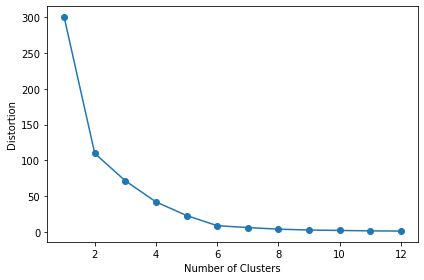

In [202]:
distortions = []
for i in range(1, 13):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=500,
                random_state=50)
    km.fit(subset_data[['sentiment', 'polarity']])
    distortions.append(km.inertia_)
plt.plot(range(1, 13), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

KMeans(max_iter=500, n_clusters=1, random_state=50)

KMeans(max_iter=500, n_clusters=2, random_state=50)

KMeans(max_iter=500, n_clusters=3, random_state=50)

KMeans(max_iter=500, n_clusters=4, random_state=50)

KMeans(max_iter=500, n_clusters=5, random_state=50)

KMeans(max_iter=500, n_clusters=6, random_state=50)

KMeans(max_iter=500, n_clusters=7, random_state=50)

KMeans(max_iter=500, random_state=50)

KMeans(max_iter=500, n_clusters=9, random_state=50)

KMeans(max_iter=500, n_clusters=10, random_state=50)

KMeans(max_iter=500, n_clusters=11, random_state=50)

KMeans(max_iter=500, n_clusters=12, random_state=50)

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Distortion')

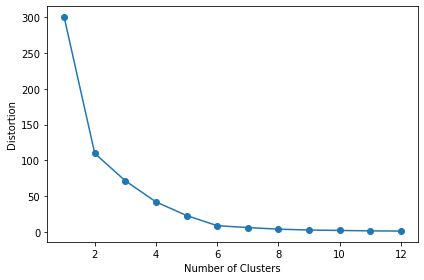

In [203]:
distortions = []
for i in range(1,13):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=500,
                random_state=50)
    km.fit(subset_data)
    distortions.append(km.inertia_)
plt.plot(range(1,13), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

# Agglomerative Clustering.

In [204]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=None,
                             distance_threshold=1.0,
                             affinity='euclidean',
                             linkage='complete')
data_ac = pd.DataFrame(ac.fit_predict(subset_data), index=subset_data.index)
data_ac.head()

data_ac.rename(columns={0 : 'cluster'}, inplace=True)
data_ac = data_ac.merge(sen_data, left_index=True, right_index=True)
data_ac.head()

,0
0,6
1,6
2,6
3,6
4,4


,cluster,tweet_id,Username,text,Artist,created_at,sentiment,polarity
0,6,1648102801388519425,CRACKANDCOLA,RT @virginsexkiller: @The8BitIdiot did you kno...,1,2023,0,0.12
1,6,1648102131356844032,GunzAnnie,RT @crockpics: The beginning of Red Hot Chili ...,1,2023,0,0.12
2,6,1648100765049978885,_0_0_0_9_,@madebyoona @tylergivens Is the Sox an tribute...,1,2023,0,0.12
3,6,1648099114540990470,JerrodBaker1,"Jacksons\nEarth, Wind &amp; Fire\nRed Hot Chil...",1,2023,0,0.15
4,4,1648097725244907521,dudekable,@softtail65 Desecration Smile - Red Hot Chili ...,1,2023,0,0.18


In [205]:
plot_data = []
for clus in set(data_ac['cluster']):
    df = data_ac[data_ac['cluster'] == clus]
    plot_data.append(go.Scatter(x=df['sentiment'], y=df['polarity'],
                                text=df['Artist'],
                                name='cluster' + str(clus), mode='markers'))

layout = go.Layout(xaxis=dict(title='Sentiment'), yaxis=dict(title='Polarity'),
                   title='Clustering')
fig = go.Figure(data=plot_data, layout=layout)
plotly.offline.iplot(fig)

# K-Means Clustering --> Positive Polarity - Sentiment Analysis.

In [206]:
pos_sen_data = sen_data[sen_data['polarity'] > 0.0]
pos_sen_data.head()

,tweet_id,Username,text,Artist,created_at,sentiment,polarity
0,1648102801388519425,CRACKANDCOLA,RT @virginsexkiller: @The8BitIdiot did you kno...,1,2023,0,0.12
1,1648102131356844032,GunzAnnie,RT @crockpics: The beginning of Red Hot Chili ...,1,2023,0,0.12
2,1648100765049978885,_0_0_0_9_,@madebyoona @tylergivens Is the Sox an tribute...,1,2023,0,0.12
3,1648099114540990470,JerrodBaker1,"Jacksons\nEarth, Wind &amp; Fire\nRed Hot Chil...",1,2023,0,0.15
4,1648097725244907521,dudekable,@softtail65 Desecration Smile - Red Hot Chili ...,1,2023,0,0.18


In [207]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

pos_pol = pd.DataFrame(sc.fit_transform(pos_sen_data[cols2]), columns=pos_sen_data[cols2].columns, index=pos_sen_data.index)

pos_pol.head()

len(pos_pol)

,polarity,sentiment,Artist
0,-0.46,0.00,0.00
1,-0.41,0.00,0.00
2,-0.41,0.00,0.00
3,-0.26,0.00,0.00
4,-0.05,0.00,0.00


102

In [208]:
from sklearn.cluster import KMeans

km_pos = KMeans(n_clusters = 6,
            init='k-means++',
            n_init=10,
            max_iter=500,
            random_state=50)
data_km = pd.DataFrame(km_pos.fit_predict(pos_pol[cols2]), index=pos_pol[cols2].index)

In [209]:
data_km.rename(columns={0 : 'cluster'}, inplace=True)
data_km = data_km.merge(sen_data, left_index=True, right_index=True)
data_km.head()

,cluster,tweet_id,Username,text,Artist,created_at,sentiment,polarity
0,0,1648102801388519425,CRACKANDCOLA,RT @virginsexkiller: @The8BitIdiot did you kno...,1,2023,0,0.12
1,0,1648102131356844032,GunzAnnie,RT @crockpics: The beginning of Red Hot Chili ...,1,2023,0,0.12
2,0,1648100765049978885,_0_0_0_9_,@madebyoona @tylergivens Is the Sox an tribute...,1,2023,0,0.12
3,0,1648099114540990470,JerrodBaker1,"Jacksons\nEarth, Wind &amp; Fire\nRed Hot Chil...",1,2023,0,0.15
4,0,1648097725244907521,dudekable,@softtail65 Desecration Smile - Red Hot Chili ...,1,2023,0,0.18


In [210]:
plot_data = []
for clus in set(data_km['cluster']):
    df = data_km[data_km['cluster'] == clus]
    plot_data.append(go.Scatter(x=df['sentiment'], y=df['polarity'],
                                text=df['Artist'],
                                name='cluster' + str(clus), mode='markers'))
    
# Added the succeeding source-code for cluster centers.
# df_cc = pd.DataFrame(km_pos.cluster_centers_)
# plot_data.append(go.Scatter(x=df_cc[1], y=df_cc[0],
#                             text=df['name'],
#                             name='cluster center', mode='markers'))

layout = go.Layout(xaxis=dict(title='Sentiment'), yaxis=dict(title='Polarity'),
                   title='Clustering')
fig = go.Figure(data=plot_data, layout=layout)
plotly.offline.iplot(fig)

KMeans(max_iter=500, n_clusters=1, random_state=50)

KMeans(max_iter=500, n_clusters=2, random_state=50)

KMeans(max_iter=500, n_clusters=3, random_state=50)

KMeans(max_iter=500, n_clusters=4, random_state=50)

KMeans(max_iter=500, n_clusters=5, random_state=50)

KMeans(max_iter=500, n_clusters=6, random_state=50)

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Distortion')

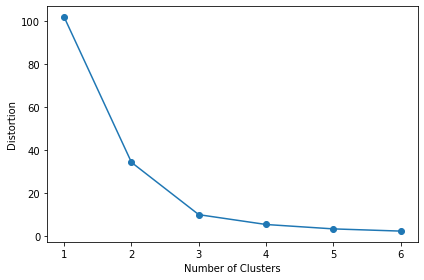

In [211]:
distortions = []
for i in range(1,7):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=500,
                random_state=50)
    km.fit(pos_pol[['sentiment', 'polarity']])
    distortions.append(km.inertia_)
plt.plot(range(1,7), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

KMeans(max_iter=500, n_clusters=1, random_state=50)

KMeans(max_iter=500, n_clusters=2, random_state=50)

KMeans(max_iter=500, n_clusters=3, random_state=50)

KMeans(max_iter=500, n_clusters=4, random_state=50)

KMeans(max_iter=500, n_clusters=5, random_state=50)

KMeans(max_iter=500, n_clusters=6, random_state=50)

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Distortion')

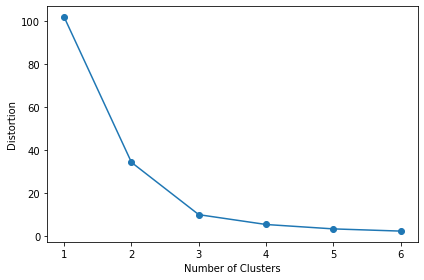

In [212]:
distortions = []
for i in range(1,7):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=500,
                random_state=50)
    km.fit(pos_pol)
    distortions.append(km.inertia_)
plt.plot(range(1,7), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

# ****
# Neural Network Creation Sector Of Program.
# ****

In [213]:
# Import relevant Python packages for building and utilizing of Feed Forward Neural Networks (FFNN) in Python.
import tensorflow as tf
import keras
import tensorflow.keras
from tensorflow.keras import layers
from keras import optimizers
import random
from random import randrange
from math import exp
from tensorflow.keras.optimizers.legacy import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score
from sklearn.metrics import classification_report, roc_auc_score

In [214]:
nn_df = sen_data.drop(columns=['tweet_id', 'Username', 'text', 'created_at'])

nn_df.head()

,Artist,sentiment,polarity
0,1,0,0.12
1,1,0,0.12
2,1,0,0.12
3,1,0,0.15
4,1,0,0.18


In [215]:
nn_df.loc[nn_df['polarity'] < 0.0] = -1

nn_df.loc[nn_df['polarity'] == 0.0] = 0

nn_df.loc[nn_df['polarity'] > 0.0] = 1

nn_df.head()

,Artist,sentiment,polarity
0,1,1,1.00
1,1,1,1.00
2,1,1,1.00
3,1,1,1.00
4,1,1,1.00


In [216]:
X_train, X_test, y_train, y_test = train_test_split(nn_df.drop(columns=['polarity']), nn_df['polarity'], test_size=0.30, random_state=13)

X_train
X_test
y_train
y_test


,Artist,sentiment
109,0,0
39,1,1
93,-1,-1
42,1,1
54,1,1
...,...,...
126,0,0
98,1,1
16,1,1
74,1,1


,Artist,sentiment
55,1,1
64,1,1
21,1,1
101,0,0
112,0,0
33,1,1
135,1,1
123,0,0
46,1,1
90,1,1


109    0.00
39     1.00
93    -1.00
42     1.00
54     1.00
       ... 
126    0.00
98     1.00
16     1.00
74     1.00
82     1.00
Name: polarity, Length: 105, dtype: float64

55     1.00
64     1.00
21     1.00
101    0.00
112    0.00
33     1.00
135    1.00
123    0.00
46     1.00
90     1.00
138   -1.00
133   -1.00
87     1.00
44     1.00
114    0.00
30     1.00
127    0.00
104    0.00
91     1.00
8      1.00
78     0.00
15     1.00
17     1.00
130    0.00
84    -1.00
144   -1.00
14     1.00
118    1.00
63     1.00
132    1.00
137    0.00
32     1.00
31     1.00
141    0.00
146    1.00
97     1.00
23     1.00
66     1.00
68     1.00
12     1.00
27     1.00
134   -1.00
96     1.00
125    1.00
110   -1.00
Name: polarity, dtype: float64

In [217]:
sa_model = Sequential()

sa_model.add(keras.Input(shape=(2,)))
sa_model.add(Dense(10, activation='sigmoid'))
sa_model.add(Dense(1))

In [218]:
sa_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [219]:
callback00 = ModelCheckpoint(filepath='best_model.hdf5', monitor='val_loss', save_best_only=True, save_weights_only=True)

callback01 = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)


In [220]:
sa_model_history = sa_model.fit(X_train, y_train, epochs=10, batch_size=10, callbacks=[callback00, callback01], validation_data=(X_test, y_test))

Epoch 1/10
11/11 [==============================] - 0s 15ms/step - loss: 6.0172e-08 - accuracy: 0.1143 - val_loss: 6.0929e-08 - val_accuracy: 0.2222
Epoch 2/10
11/11 [==============================] - 0s 4ms/step - loss: 6.0172e-08 - accuracy: 0.1143 - val_loss: 6.0929e-08 - val_accuracy: 0.2222
Epoch 3/10
11/11 [==============================] - 0s 5ms/step - loss: 6.0172e-08 - accuracy: 0.1143 - val_loss: 6.0929e-08 - val_accuracy: 0.2222
Epoch 4/10
11/11 [==============================] - 0s 5ms/step - loss: 6.0172e-08 - accuracy: 0.1143 - val_loss: 6.0929e-08 - val_accuracy: 0.2222
Epoch 5/10
11/11 [==============================] - 0s 5ms/step - loss: 6.0172e-08 - accuracy: 0.1143 - val_loss: 6.0929e-08 - val_accuracy: 0.2222
Epoch 6/10
11/11 [==============================] - 0s 5ms/step - loss: 6.0172e-08 - accuracy: 0.1143 - val_loss: 6.0929e-08 - val_accuracy: 0.2222
Epoch 7/10
11/11 [==============================] - 0s 4ms/step - loss: 6.0172e-08 - accuracy: 0.1143 - val_los

Text(0.5, 1.0, 'Backpropagated FFNN Accuracy per Epoch')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'Accuracy')

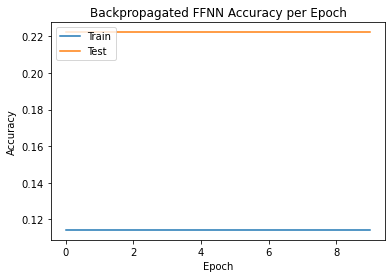

In [221]:
# Plot train data vs. test data accuracy scores per epoch of Backpropagated FFNN model.

plt.plot(sa_model_history.history['accuracy'])
plt.plot(sa_model_history.history['val_accuracy'])
plt.title('Backpropagated FFNN Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [222]:
sa_pred_x = sa_model.predict(X_train).round()
sa_pred_y = sa_model.predict(X_test).round()

2/2 [==============================] - 0s 2ms/step


In [223]:
sa_train_cm = confusion_matrix(y_train, sa_pred_x)
sa_train_cr = classification_report(y_train, sa_pred_x)

print(sa_train_cm)
print(sa_train_cr)

[[20  0  0]
 [12  0  0]
 [73  0  0]]
              precision    recall  f1-score   support

        -1.0       0.19      1.00      0.32        20
         0.0       0.00      0.00      0.00        12
         1.0       0.00      0.00      0.00        73

    accuracy                           0.19       105
   macro avg       0.06      0.33      0.11       105
weighted avg       0.04      0.19      0.06       105



In [224]:
sa_test_cm = confusion_matrix(y_test, sa_pred_y)
sa_test_cr = classification_report(y_test, sa_pred_y)

print(sa_test_cm)
print(sa_test_cr)

[[ 6  0  0]
 [10  0  0]
 [29  0  0]]
              precision    recall  f1-score   support

        -1.0       0.13      1.00      0.24         6
         0.0       0.00      0.00      0.00        10
         1.0       0.00      0.00      0.00        29

    accuracy                           0.13        45
   macro avg       0.04      0.33      0.08        45
weighted avg       0.02      0.13      0.03        45



In [225]:
import seaborn as sns

<Figure size 360x288 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'FFNN Train Data Confusion Matrix')

Text(0.5, 15.0, 'Predicted Values')

Text(24.0, 0.5, 'Actual Values')

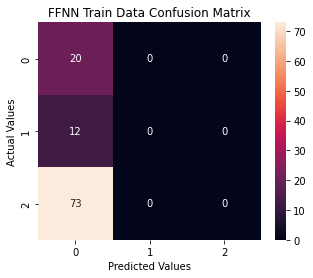

In [226]:
# FFNN Train Dataset Confusion Matrix.

plt.figure(figsize=(5,4))
sns.heatmap(sa_train_cm, annot=True)
plt.title('FFNN Train Data Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

<Figure size 360x288 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'FFNN Test Data Confusion Matrix')

Text(0.5, 15.0, 'Predicted Values')

Text(24.0, 0.5, 'Actual Values')

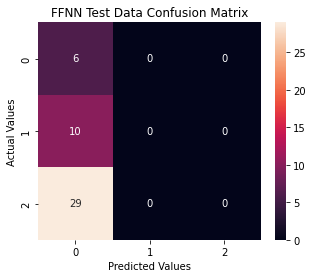

In [227]:
# FFNN Test Dataset Confusion Matrix.

plt.figure(figsize=(5,4))
sns.heatmap(sa_test_cm, annot=True)
plt.title('FFNN Test Data Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [228]:
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
import warnings 

In [229]:
warnings.filterwarnings('ignore')

In [230]:
mlp_sa = MLPClassifier(#hidden_layer_sizes(100,),
                       max_iter=10,
                       alpha=1e-4,
                       solver='adam',
                       verbose=10,
                       tol=1e-4,
                       random_state=13,
                       learning_rate_init=0.1,
                       early_stopping=True)

In [231]:
mlp_sa.fit(X_train, y_train)

Iteration 1, loss = 1.05915176
Validation score: 0.818182
Iteration 2, loss = 0.27443709
Validation score: 0.818182
Iteration 3, loss = 0.24043978
Validation score: 0.818182
Iteration 4, loss = 0.19139342
Validation score: 0.818182
Iteration 5, loss = 0.10891754
Validation score: 1.000000
Iteration 6, loss = 0.04473702
Validation score: 1.000000
Iteration 7, loss = 0.01395280
Validation score: 1.000000
Iteration 8, loss = 0.00407992
Validation score: 1.000000
Iteration 9, loss = 0.00185278
Validation score: 1.000000
Iteration 10, loss = 0.00203339
Validation score: 1.000000


MLPClassifier(early_stopping=True, learning_rate_init=0.1, max_iter=10,
              random_state=13, verbose=10)

In [232]:
print('Training set score: {0}'.format(mlp_sa.score(X_train, y_train)))
print('Testing set score: {0}'.format(mlp_sa.score(X_test, y_test)))

Training set score: 1.0
Testing set score: 1.0


In [233]:
train_pred = mlp_sa.predict(X_train)
test_pred = mlp_sa.predict(X_test)

In [234]:
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

In [235]:
print(train_acc)
print(test_acc)

1.0
1.0


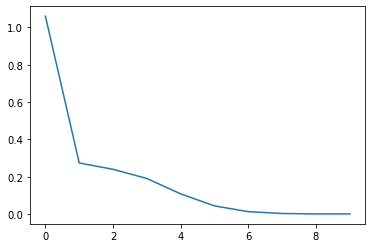

In [236]:
plt.plot(mlp_sa.loss_curve_)
plt.show()

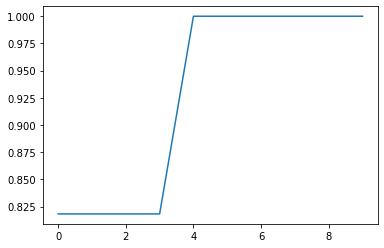

In [237]:
plt.plot(mlp_sa.validation_scores_)
plt.show()

In [238]:
cm_mlp_tr = confusion_matrix(y_train, train_pred)
cr_mlp_tr = classification_report(y_train, train_pred)

print(cm_mlp_tr)
print(cr_mlp_tr)

[[20  0  0]
 [ 0 12  0]
 [ 0  0 73]]
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        20
         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00        73

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [239]:
cm_mlp_ts = confusion_matrix(y_test, test_pred)
cr_mlp_ts = classification_report(y_test, test_pred)

print(cm_mlp_ts)
print(cr_mlp_ts)

[[ 6  0  0]
 [ 0 10  0]
 [ 0  0 29]]
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00         6
         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00        29

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



<Figure size 360x288 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Train Dataset Confusion Matrix')

Text(0.5, 15.0, 'Predicted Values')

Text(24.0, 0.5, 'Actual Values')

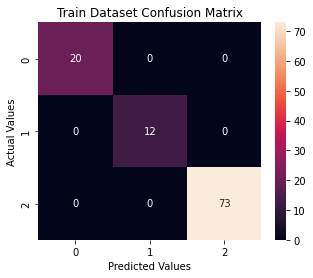

In [240]:
# Train Dataset Confusion Matrix.
plt.figure(figsize=(5,4))
sns.heatmap(cm_mlp_tr, annot=True)
plt.title('Train Dataset Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

<Figure size 360x288 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Test Dataset Confusion Matrix')

Text(0.5, 15.0, 'Predicted Values')

Text(24.0, 0.5, 'Actual Values')

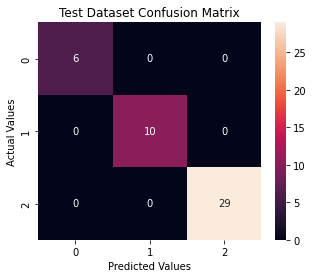

In [241]:
# Test Dataset Confusion Matrix.
plt.figure(figsize=(5,4))
sns.heatmap(cm_mlp_ts, annot=True)
plt.title('Test Dataset Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [242]:
print(mlp_sa.coefs_)

[array([[-0.13876448,  0.02961914, -0.13739778,  0.55725615,  0.57268571,
         0.28077324, -0.24419616,  0.51810848, -0.21080603,  0.29826843,
         0.00747536,  0.18026284,  0.08292923, -0.12475412,  0.02392059,
        -0.25630047, -0.45457675,  0.02647356,  0.00265371, -0.4707108 ,
         0.55895146,  0.19362235,  0.24349549, -0.05905674,  0.07476745,
        -0.50552012,  0.4437377 , -0.02126897,  0.07253423, -0.15471672,
         0.52952267,  0.0912807 , -0.02681513,  0.30167884, -0.27443641,
         0.54185642, -0.54373123,  0.02982698, -0.0297286 , -0.38679079,
        -0.48415266, -0.20839925,  0.00575869, -0.47106206,  0.00991711,
         0.16652711, -0.36737803, -0.21475046, -0.02931066, -0.60931224,
         0.43657117, -0.31737799,  0.12142572, -0.56851521, -0.467268  ,
         0.17095187, -0.01404709,  0.41883756,  0.16980842, -0.01525459,
         0.35513077,  0.06121631, -0.02491356,  0.27845425,  0.02337671,
         0.17594952, -0.28718014,  0.41896948,  0.

In [243]:
print(mlp_sa.intercepts_)

[array([-0.21842327, -0.20788935, -0.31184794,  0.01792627, -0.04958013,
        0.4225681 , -0.43341852, -0.04545395, -0.20707672, -0.23575418,
       -0.17291793, -0.24942356, -0.43507447, -0.21895618, -0.20234359,
        0.49586813,  0.23695569, -0.00966659, -0.1624052 ,  0.32254296,
        0.32227578,  0.31306722,  0.32231028,  0.04285786, -0.43100946,
       -0.23627518, -0.07253699, -0.10605698, -0.16507265, -0.18286687,
       -0.02419477, -0.46029735, -0.19261385, -0.30211778, -0.19351955,
        0.06273522, -0.24316832, -0.15442661, -0.08646909, -0.19403541,
       -0.2442072 , -0.1470911 , -0.22905921,  0.04850526, -0.22842292,
       -0.20971666, -0.12794061, -0.01117828, -0.235363  , -0.04507639,
       -0.03552696,  0.15709193, -0.38569246, -0.03055423,  0.40884945,
       -0.23129572, -0.18300692,  0.14709427, -0.51202513, -0.2118542 ,
        0.10410602,  0.40598321, -0.13739598,  0.3168155 , -0.22164039,
        0.49409591, -0.28023849,  0.28996695,  0.21223181, -0.4

In [244]:
print(mlp_sa.n_features_in_)

2
